In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv
/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
original_data = pd.read_csv('/kaggle/input/student-bag-price-prediction-dataset/Noisy_Student_Bag_Price_Prediction_Dataset.csv')

In [3]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
test_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [5]:
original_data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Nylon,Small,2.0,No,Yes,Backpack,Green,13.340058,143.445135
1,Under Armour,Nylon,Large,4.0,Yes,Yes,Tote,Pink,5.918030,72.086319
2,Nike,Nylon,Large,NaN,No,Yes,Messenger,Red,24.088386,29.699631
3,Nike,Nylon,Small,1.0,Yes,No,Messenger,Pink,5.000000,27.181990
4,Under Armour,Leather,Small,8.0,Yes,No,NaN,Black,11.258172,71.953236


In [6]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = train_data.shape

num_test_rows, num_test_columns = test_data.shape

num_original_rows, num_original_columns = original_data.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Original Data:")
print(f"Number of Rows: {num_original_rows}")
print(f"Number of Columns: {num_original_columns}")

Training Data:
Number of Rows: 300000
Number of Columns: 11

Test Data:
Number of Rows: 200000
Number of Columns: 10

Original Data:
Number of Rows: 52500
Number of Columns: 10


In [7]:
# Creating a table for missing values, unique values and data types of the features

missing_values_train = pd.DataFrame({'Feature': train_data.columns,
                              '[TRAIN] No. of Missing Values': train_data.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((train_data.isnull().sum().values)/len(train_data)*100)})

missing_values_test = pd.DataFrame({'Feature': test_data.columns,
                             '[TEST] No.of Missing Values': test_data.isnull().sum().values,
                             '[TEST] % of Missing Values': ((test_data.isnull().sum().values)/len(test_data)*100)})

missing_values_original = pd.DataFrame({'Feature': original_data.columns,
                             '[ORIGINAL] No.of Missing Values': original_data.isnull().sum().values,
                             '[ORIGINAL] % of Missing Values': ((original_data.isnull().sum().values)/len(original_data)*100)})

unique_values = pd.DataFrame({'Feature': train_data.columns,
                              'No. of Unique Values[FROM TRAIN]': train_data.nunique().values})

feature_types = pd.DataFrame({'Feature': train_data.columns,
                              'DataType': train_data.dtypes})

merged_df = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
merged_df = pd.merge(merged_df, missing_values_original, on='Feature', how='left')
merged_df = pd.merge(merged_df, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,[TEST] No.of Missing Values,[TEST] % of Missing Values,[ORIGINAL] No.of Missing Values,[ORIGINAL] % of Missing Values,No. of Unique Values[FROM TRAIN],DataType
0,id,0,0.000000,0.0,0.0000,NaN,NaN,300000,int64
1,Brand,9705,3.235000,6227.0,3.1135,2625.0,5.0,5,object
2,Material,8347,2.782333,5613.0,2.8065,2625.0,5.0,4,object
3,Size,6595,2.198333,4381.0,2.1905,2625.0,5.0,3,object
4,Compartments,0,0.000000,0.0,0.0000,2625.0,5.0,10,float64
5,Laptop Compartment,7444,2.481333,4962.0,2.4810,2625.0,5.0,2,object
6,Waterproof,7050,2.350000,4811.0,2.4055,2625.0,5.0,2,object
7,Style,7970,2.656667,5153.0,2.5765,2625.0,5.0,3,object
8,Color,9950,3.316667,6785.0,3.3925,2625.0,5.0,6,object
9,Weight Capacity (kg),138,0.046000,77.0,0.0385,2625.0,5.0,181596,float64


In [8]:
# Count duplicate rows in train_data
train_duplicates = train_data.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = test_data.duplicated().sum()

# Count duplicate rows in original_data
original_duplicates = original_data.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in original_data: {original_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0
Number of duplicate rows in original_data: 2


In [9]:
# Having a look at the description of all the numerical columns present in the dataset

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


In [10]:
numerical_variables = ['Weight Capacity (kg)']
target_variable = 'Price' 
categorical_variables = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


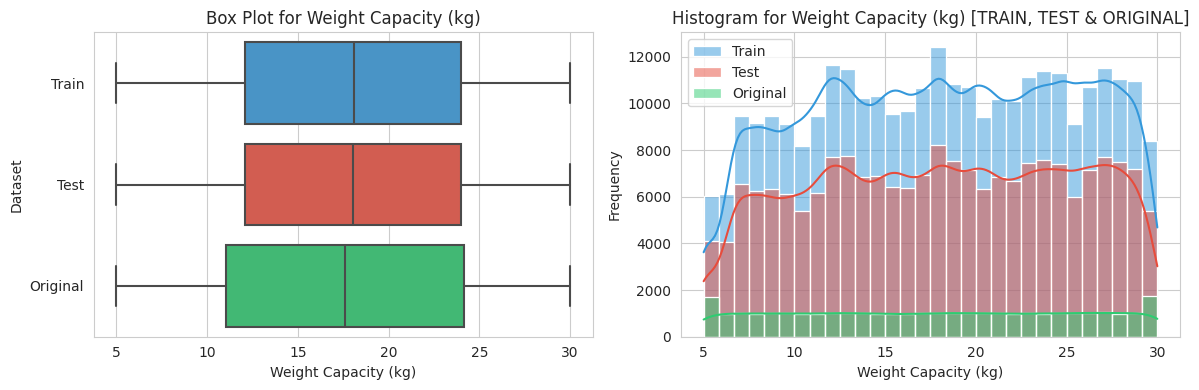

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Analysis of all NUMERICAL features

# Define a custom color palette
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'
original_data['Dataset'] = 'Original'

variables = [col for col in train_data.columns if col in numerical_variables]

# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data, test_data,original_data.dropna()]), x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Separate Histograms
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=variable, color=custom_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=test_data, x=variable, color=custom_palette[1], kde=True, bins=30, label="Test")
    sns.histplot(data=original_data.dropna(), x=variable, color=custom_palette[2], kde=True, bins=30, label="Original")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN, TEST & ORIGINAL]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each variable
for variable in variables:
    create_variable_plots(variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)
original_data.drop('Dataset', axis=1, inplace=True)

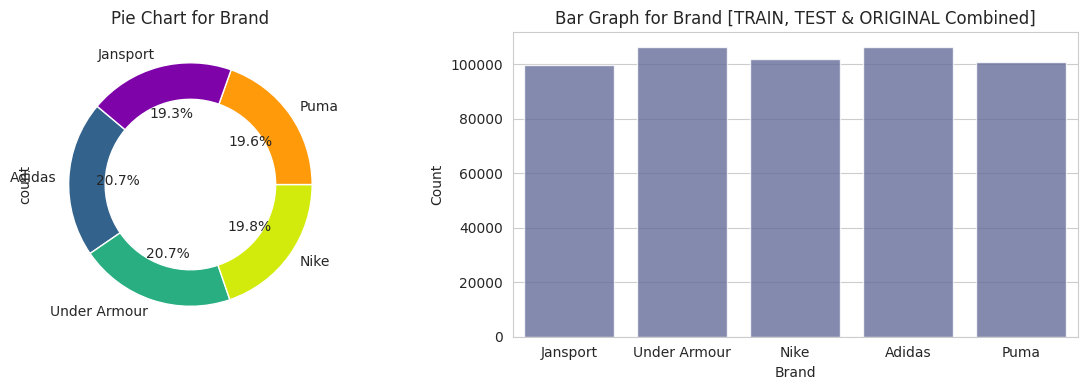

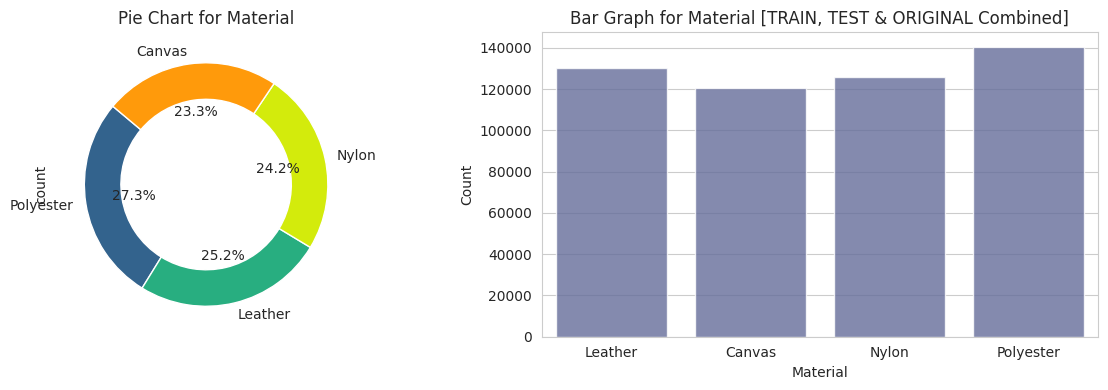

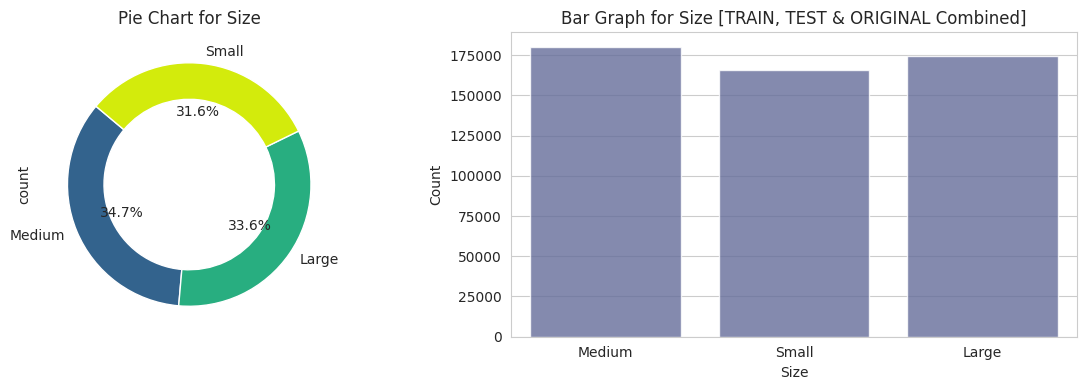

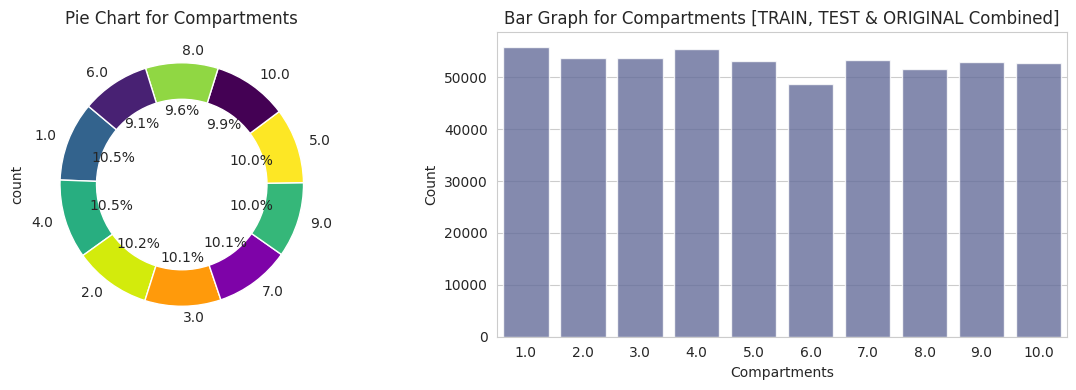

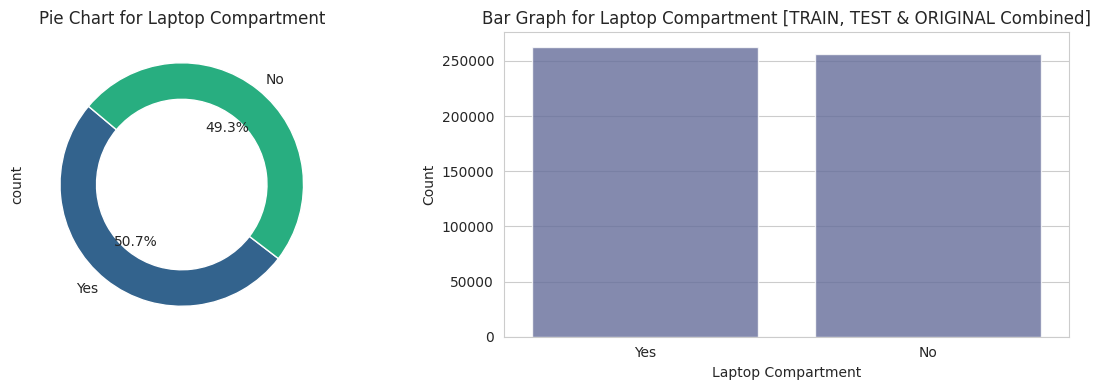

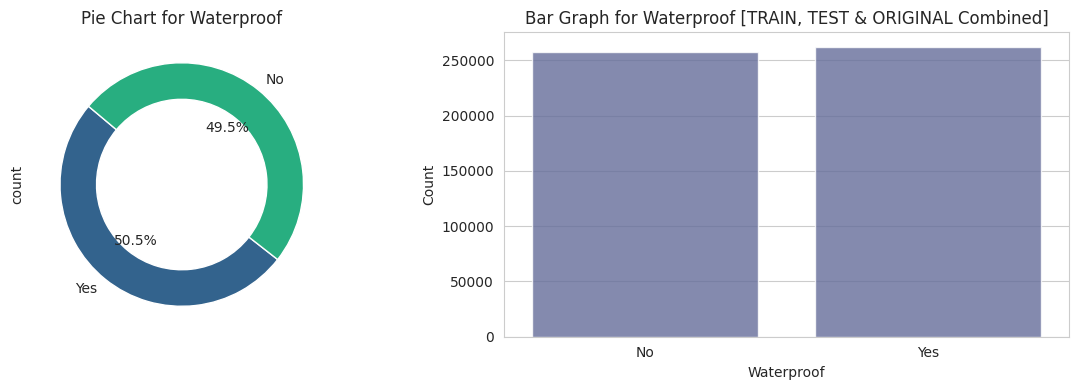

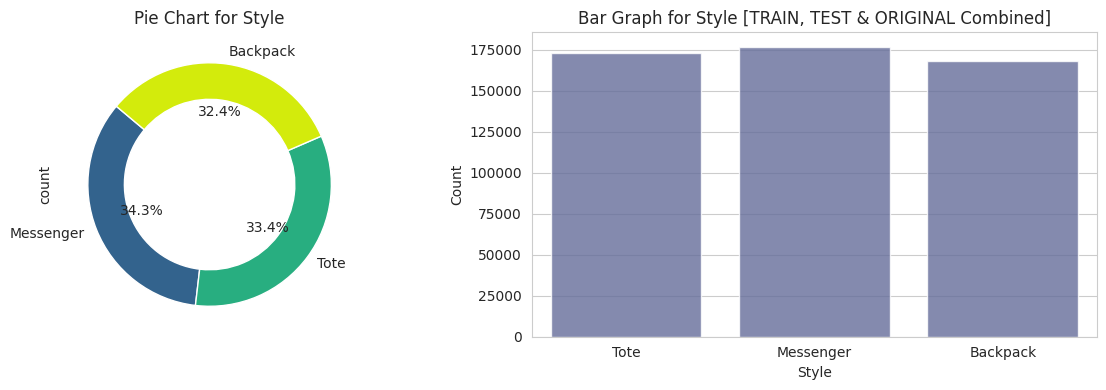

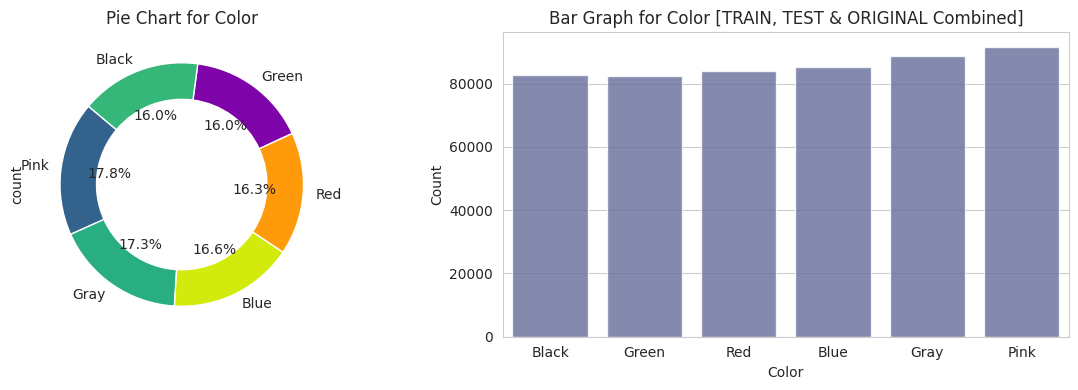

In [12]:

pie_chart_palette = ['#33638d', '#28ae80', '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779', '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']

countplot_color = '#5C67A3'

# Function to create and display a row of plots for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    train_data[variable].value_counts().plot.pie(
        autopct='%1.1f%%', colors=pie_chart_palette, wedgeprops=dict(width=0.3), startangle=140
    )
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(
        data=pd.concat([train_data, test_data, original_data.dropna()]), 
        x=variable, 
        color=countplot_color,  # Using a single color for the countplot
        alpha=0.8  # Setting 80% opacity
    )
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable} [TRAIN, TEST & ORIGINAL Combined]")

    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


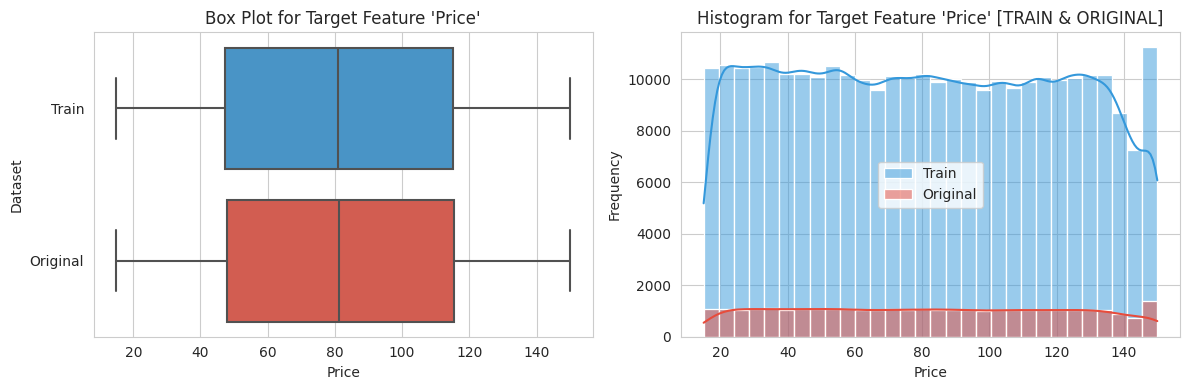

In [13]:
# Analysis of the TARGET feature (Continuous)

# Define a custom color palette
target_palette = ['#3498db', '#e74c3c']

# Add 'Dataset' column to distinguish between Train and Original data
train_data['Dataset'] = 'Train'
original_data['Dataset'] = 'Original'

# Function to create and display a row of plots for the target variable
def create_target_plots(target_variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data, original_data.dropna()]), x=target_variable, y="Dataset", palette=target_palette)
    plt.xlabel(target_variable)
    plt.title(f"Box Plot for Target Feature '{target_variable}'")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=target_variable, color=target_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=original_data.dropna(), x=target_variable, color=target_palette[1], kde=True, bins=30, label="Original")
    plt.xlabel(target_variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for Target Feature '{target_variable}' [TRAIN & ORIGINAL]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for the target variable
create_target_plots(target_variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
original_data.drop('Dataset', axis=1, inplace=True)

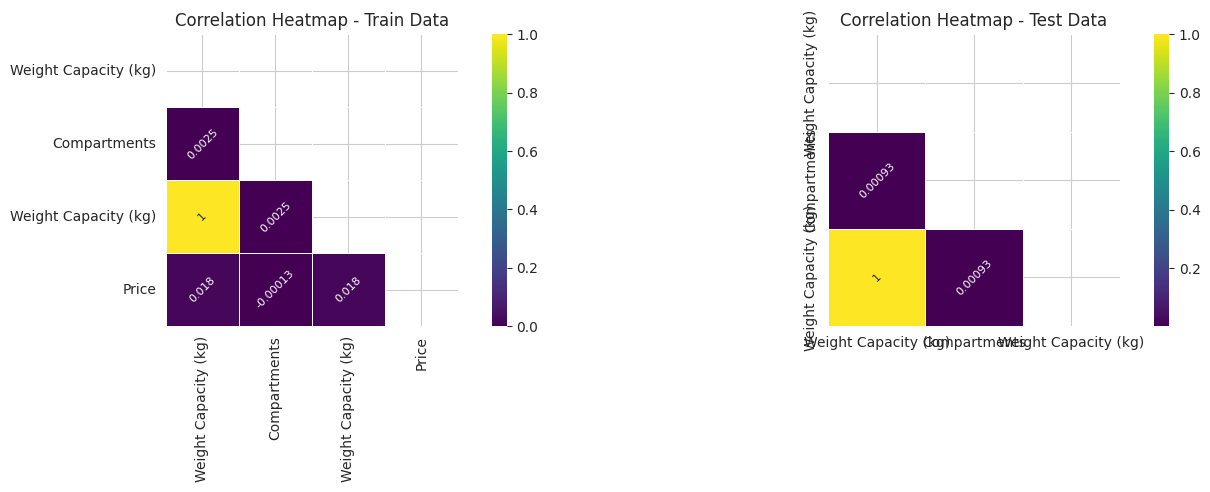

In [14]:

variables = [col for col in train_data.columns if col in numerical_variables]

cat_variables_train = ['Compartments','Weight Capacity (kg)', 'Price']
cat_variables_test = ['Compartments','Weight Capacity (kg)']

# Adding variables to the existing list
train_variables = variables + cat_variables_train
test_variables = variables + cat_variables_test

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap='viridis', annot=True,
                     square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Test Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Drop null values from original_data
original_data = original_data.dropna()

# Print the count of null values in original_data
print(original_data.isnull().sum())

# Combine original_data with train_data
train_data = pd.concat([train_data, original_data], axis=0).reset_index(drop=True)

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [16]:
# Define imputation strategies
categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
numerical_features = ["Weight Capacity (kg)"]

# Fill categorical missing values with mode (most frequent value)
for col in categorical_features:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Fill numerical missing values with median
for col in numerical_features:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)

/tmp/ipykernel_19/1977685458.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
/tmp/ipykernel_19/1977685458.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [17]:
from sklearn.preprocessing import LabelEncoder

def perform_feature_engineering(df):
    # Brand Material Interaction - Certain materials may be common for specific brands
    df['Brand_Material'] = df['Brand'] + '_' + df['Material']

    # Brand & Size Interaction - Some brands may produce only specific sizes
    df['Brand_Size'] = df['Brand'] + '_' + df['Size']

    # Has Laptop Compartment - Convert Yes/No to 1/0 for easier analysis
    df['Has_Laptop_Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})

    # Is Waterproof - Convert Yes/No to 1/0 for easier analysis
    df['Is_Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})

    # Compartments Binning - Group compartments into categories
    df['Compartments_Category'] = pd.cut(df['Compartments'], bins=[0, 2, 5, 10, np.inf], labels=['Few', 'Moderate', 'Many', 'Very Many'])

    # Weight Capacity Ratio - Normalize weight capacity using the max value
    df['Weight_Capacity_Ratio'] = df['Weight Capacity (kg)'] / df['Weight Capacity (kg)'].max()

    # Interaction Feature: Weight vs. Compartments - Some bags may hold more with less compartments
    df['Weight_to_Compartments'] = df['Weight Capacity (kg)'] / (df['Compartments'] + 1)  # Avoid division by zero

    # Style and Size Interaction - Certain styles may correlate with sizes
    df['Style_Size'] = df['Style'] + '_' + df['Size']

    return df

# Apply the function to the training data
train_data = perform_feature_engineering(train_data)

# Apply the function to the test data
test_data = perform_feature_engineering(test_data)

In [18]:
id_test = test_data['id']

columns_to_drop = ['id']
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

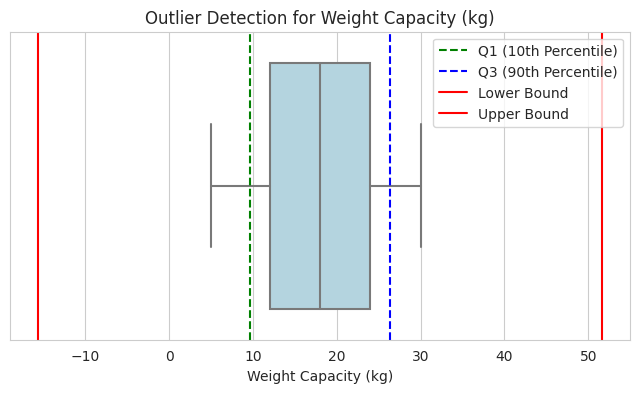

Rows deleted for Weight Capacity (kg): 0


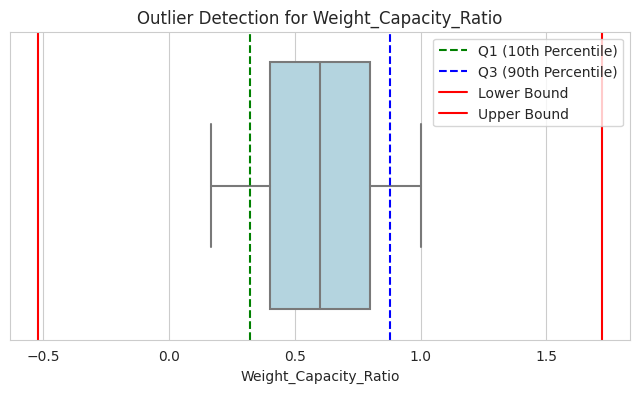

Rows deleted for Weight_Capacity_Ratio: 0


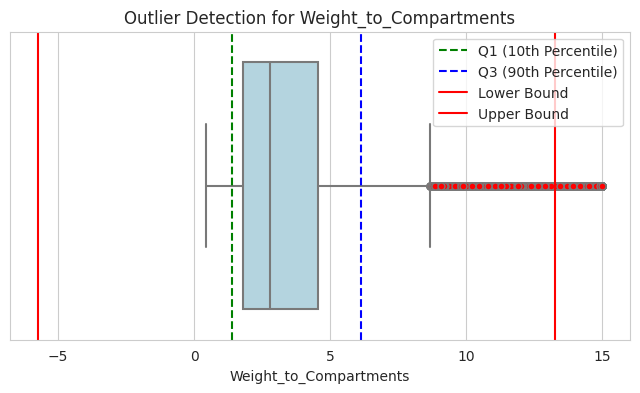

Rows deleted for Weight_to_Compartments: 5158
Total rows deleted: 5158


In [19]:
columns_to_check = ['Weight Capacity (kg)','Weight_Capacity_Ratio','Weight_to_Compartments']

# Function to remove outliers using IQR and visualize
def remove_outliers_iqr_with_plot(data, column):
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Calculate the number of rows deleted
    rows_deleted = len(data) - len(filtered_data)
    
    # Plot the distribution with outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='lightblue', flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
    
    # Highlight Q1 and Q3
    plt.axvline(Q1, color='green', linestyle='--', label='Q1 (10th Percentile)')
    plt.axvline(Q3, color='blue', linestyle='--', label='Q3 (90th Percentile)')
    
    # Highlight lower and upper bounds
    plt.axvline(lower_bound, color='red', linestyle='-', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='-', label='Upper Bound')

    plt.title(f'Outlier Detection for {column}')
    plt.legend()
    plt.xlabel(column)
    plt.show()
    
    return filtered_data, rows_deleted

# Apply function to each numerical column and visualize
rows_deleted_total = 0

for column in columns_to_check:
    train_data, rows_deleted = remove_outliers_iqr_with_plot(train_data, column)
    rows_deleted_total += rows_deleted
    print(f"Rows deleted for {column}: {rows_deleted}")

print(f"Total rows deleted: {rows_deleted_total}")

In [20]:
y = train_data['Price']

In [21]:
# [FOR TRAIN]
# Identify features with skewness greater than 0.75
skewed_features = train_data[numerical_variables].skew()[train_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Plot skewed features before transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {feature} before log transformation')
    plt.show()

# Apply log1p transformation to skewed features
train_data[skewed_features] = np.log1p(train_data[skewed_features])

# Plot skewed features after transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {feature} after log transformation')
    plt.show()

Features to be transformed (skewness > 0.75):


array([], dtype=object)

In [22]:
# [FOR TEST]
# Identify features with skewness greater than 0.75
skewed_features = test_data[numerical_variables].skew()[test_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Plot skewed features before transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(test_data[feature], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {feature} before log transformation')
    plt.show()

# Apply log1p transformation to skewed features
test_data[skewed_features] = np.log1p(test_data[skewed_features])

Features to be transformed (skewness > 0.75):


array([], dtype=object)

In [23]:
# Plot skewed features after transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(test_data[feature], bins=50, kde=True, color='green')
    plt.title(f'Distribution of {feature} after log transformation')
    plt.show()

In [24]:
# Selecting specific columns for encoding
columns_to_encode = ['Brand', 'Material', 'Size', 'Laptop Compartment','Waterproof', 'Style', 'Color','Brand_Material', 'Brand_Size', 'Has_Laptop_Compartment','Is_Waterproof', 'Compartments_Category', 'Style_Size']
train_data_to_encode = train_data[columns_to_encode]
test_data_to_encode = test_data[columns_to_encode]

# Dropping selected columns for scaling
train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
test_data_to_scale = test_data.drop(columns_to_encode, axis=1)

train_data_encoded = pd.get_dummies(train_data_to_encode, columns=columns_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_to_encode, columns=columns_to_encode, drop_first=True)

In [25]:
train_data_encoded.head()

,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Laptop Compartment_Yes,...,Compartments_Category_Many,Compartments_Category_Very Many,Style_Size_Backpack_Medium,Style_Size_Backpack_Small,Style_Size_Messenger_Large,Style_Size_Messenger_Medium,Style_Size_Messenger_Small,Style_Size_Tote_Large,Style_Size_Tote_Medium,Style_Size_Tote_Small
0,True,False,False,False,True,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,True,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [26]:
test_data_encoded.head()

,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Laptop Compartment_Yes,...,Compartments_Category_Many,Compartments_Category_Very Many,Style_Size_Backpack_Medium,Style_Size_Backpack_Small,Style_Size_Messenger_Large,Style_Size_Messenger_Medium,Style_Size_Messenger_Small,Style_Size_Tote_Large,Style_Size_Tote_Medium,Style_Size_Tote_Small
0,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training data
minmax_scaler.fit(train_data_to_scale.drop(['Price'], axis=1))

# Scale the training data
scaled_data_train = minmax_scaler.transform(train_data_to_scale.drop(['Price'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=train_data_to_scale.drop(['Price'], axis=1).columns)

# Scale the test data using the parameters from the training data
scaled_data_test = minmax_scaler.transform(test_data_to_scale)
scaled_test_df = pd.DataFrame(scaled_data_test, columns=test_data_to_scale.columns)

In [28]:
scaled_train_df.head()

,Compartments,Weight Capacity (kg),Weight_Capacity_Ratio,Weight_to_Compartments
0,0.666667,0.264469,0.264469,0.077850
1,1.000000,0.883141,0.883141,0.156738
2,0.111111,0.465750,0.465750,0.397742
3,0.777778,0.317489,0.317489,0.076757
4,0.000000,0.509974,0.509974,0.657529


In [29]:
scaled_test_df.head()

,Compartments,Weight Capacity (kg),Weight_Capacity_Ratio,Weight_to_Compartments
0,0.111111,0.626846,0.626846,0.502575
1,0.666667,0.342564,0.342564,0.096907
2,0.888889,0.272392,0.272392,0.056727
3,0.000000,0.539081,0.539081,0.685942
4,0.111111,0.196318,0.196318,0.222409


In [30]:
# Concatenate train datasets
train_data_combined = pd.concat([train_data_encoded.reset_index(drop=True), scaled_train_df.reset_index(drop=True)], axis=1)

# Concatenate test datasets
test_data_combined = pd.concat([test_data_encoded.reset_index(drop=True), scaled_test_df.reset_index(drop=True)], axis=1)

In [31]:
train_data_combined.head()

,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Laptop Compartment_Yes,...,Style_Size_Messenger_Large,Style_Size_Messenger_Medium,Style_Size_Messenger_Small,Style_Size_Tote_Large,Style_Size_Tote_Medium,Style_Size_Tote_Small,Compartments,Weight Capacity (kg),Weight_Capacity_Ratio,Weight_to_Compartments
0,True,False,False,False,True,False,False,True,False,True,...,False,False,False,False,True,False,0.666667,0.264469,0.264469,0.077850
1,True,False,False,False,False,False,False,False,True,True,...,False,False,True,False,False,False,1.000000,0.883141,0.883141,0.156738
2,False,False,False,True,True,False,False,False,True,True,...,False,False,True,False,False,False,0.111111,0.465750,0.465750,0.397742
3,False,True,False,False,False,True,False,False,True,True,...,False,False,True,False,False,False,0.777778,0.317489,0.317489,0.076757
4,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,0.000000,0.509974,0.509974,0.657529


In [32]:
test_data_combined.head()

,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Laptop Compartment_Yes,...,Style_Size_Messenger_Large,Style_Size_Messenger_Medium,Style_Size_Messenger_Small,Style_Size_Tote_Large,Style_Size_Tote_Medium,Style_Size_Tote_Small,Compartments,Weight Capacity (kg),Weight_Capacity_Ratio,Weight_to_Compartments
0,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,True,0.111111,0.626846,0.626846,0.502575
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,0.666667,0.342564,0.342564,0.096907
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,0.888889,0.272392,0.272392,0.056727
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,0.000000,0.539081,0.539081,0.685942
4,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,0.111111,0.196318,0.196318,0.222409


In [33]:
from sklearn.model_selection import KFold
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Define Cross-Validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# CatBoost parameters (optimized)
catboost_params = {
    "iterations": 300,
    "learning_rate": 0.1,
    "depth": 6,
    "verbose": 0,
    "random_seed": 42
}

# Lists to store results
rmse_scores = []
mae_scores = []
oof_preds = np.zeros(len(train_data_combined))
test_preds_cb = np.zeros(len(test_data_combined))

# Store feature importances
feature_importance_list = np.zeros(train_data_combined.shape[1])

# Perform K-Fold Cross Validation
print("Training using Cross-Validation...")
for fold, (train_idx, val_idx) in enumerate(kf.split(train_data_combined)):
    print(f"\nTraining Fold {fold+1}...")

    X_train, X_val = train_data_combined.iloc[train_idx], train_data_combined.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Define model
    cb_model = cb.CatBoostRegressor(**catboost_params)

    # Train model
    cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

    # Predict on validation set
    val_preds_cb = cb_model.predict(X_val)
    oof_preds[val_idx] = val_preds_cb

    # Calculate and store scores
    rmse = np.sqrt(mean_squared_error(y_val, val_preds_cb))
    mae = mean_absolute_error(y_val, val_preds_cb)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    print(f"Fold {fold+1} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    # Accumulate feature importances
    feature_importance_list += cb_model.get_feature_importance() / kf.get_n_splits()

    # Predict on test data and average across folds
    test_preds_cb += cb_model.predict(test_data_combined) / kf.get_n_splits()

Training using Cross-Validation...

Training Fold 1...
Fold 1 RMSE: 38.9501, MAE: 33.6905

Training Fold 2...
Fold 2 RMSE: 39.0186, MAE: 33.7532

Training Fold 3...
Fold 3 RMSE: 38.9054, MAE: 33.6572

Training Fold 4...
Fold 4 RMSE: 39.1533, MAE: 33.8988

Training Fold 5...
Fold 5 RMSE: 39.1924, MAE: 33.9253

Training Fold 6...
Fold 6 RMSE: 39.0387, MAE: 33.8167

Training Fold 7...
Fold 7 RMSE: 39.0522, MAE: 33.7752

Training Fold 8...
Fold 8 RMSE: 39.0576, MAE: 33.8812

Training Fold 9...
Fold 9 RMSE: 39.0328, MAE: 33.7650

Training Fold 10...
Fold 10 RMSE: 38.9726, MAE: 33.7099



Cross-Validation Results:
Mean RMSE: 39.0374
Mean MAE: 33.7873


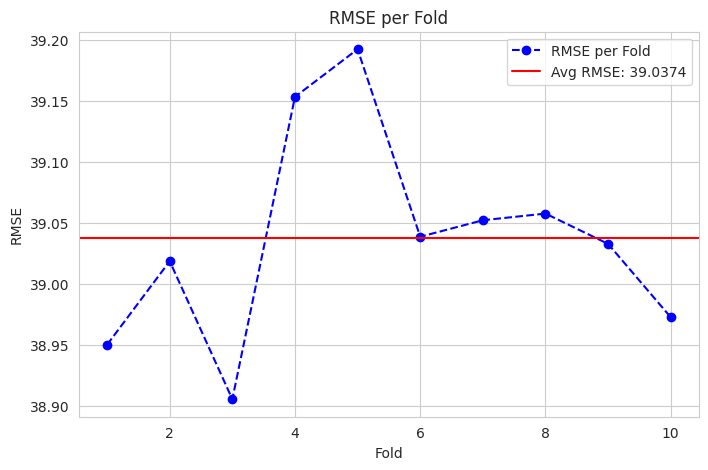

In [34]:
# Final evaluation
cv_rmse = np.mean(rmse_scores)
cv_mae = np.mean(mae_scores)

print("\nCross-Validation Results:")
print(f"Mean RMSE: {cv_rmse:.4f}")
print(f"Mean MAE: {cv_mae:.4f}")

# Plot RMSE per fold if needed
if len(rmse_scores) > 1:
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', linestyle='--', color='b', label='RMSE per Fold')
    plt.axhline(y=cv_rmse, color='r', linestyle='-', label=f'Avg RMSE: {cv_rmse:.4f}')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.title('RMSE per Fold')
    plt.legend()
    plt.show()

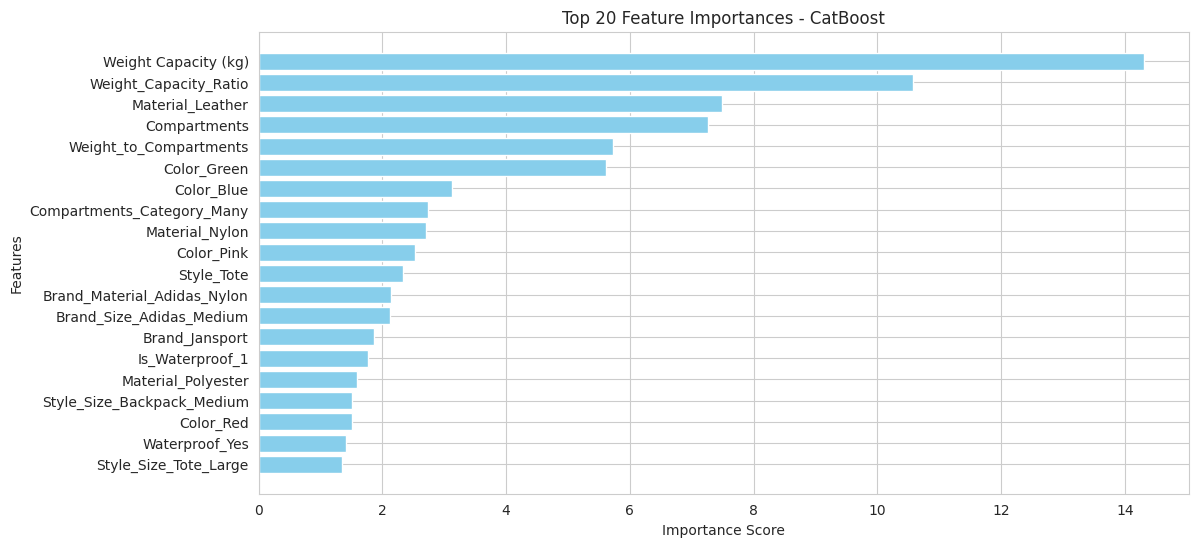

Selected 28 features out of 68 using threshold: 0.7157


In [35]:
# Feature importance visualization
feature_importance_df = pd.DataFrame({
    'Feature': train_data_combined.columns,
    'Importance': feature_importance_list
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances - CatBoost')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Determine threshold for feature selection
median_importance = np.median(feature_importance_list)
threshold = max(median_importance, 0.05 * np.max(feature_importance_list))  # Keep features > 5% of max importance

selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

print(f"Selected {len(selected_features)} features out of {train_data_combined.shape[1]} using threshold: {threshold:.4f}")

In [36]:
# Remove all conda packages
#!find /opt/conda \( -name "cudf*" -o -name "libcudf*" -o -name "cuml*" -o -name "libcuml*" \
#               -o -name "cugraph*" -o -name "libcugraph*" -o -name "raft*" -o -name "libraft*" \
#               -o -name "pylibraft*" -o -name "libkvikio*" -o -name "*dask*" -o -name "rmm*"\
#               -o -name "librmm*" \) -exec rm -rf {} \; 2>/dev/null

# pip uninstall, just incase there are packages lying around
#!pip uninstall cudf cuml dask-cudf cuml cugraph cupy cupy-cuda12x --y

#!pip install \
#    --extra-index-url=https://pypi.nvidia.com \
#    cudf-cu12==24.4.* cuml-cu12==24.4.* 

In [37]:
from cuml.preprocessing import TargetEncoder  # RAPIDS Target Encoding

In [38]:
# Compute the mean price from training data
train_mean_price = train_data['Price'].mean()

# Apply to test data
test_data['Baseline1_Price'] = train_mean_price

print(f"Baseline 1 - Mean Price Prediction: {train_mean_price:.2f}")

Baseline 1 - Mean Price Prediction: 81.45


In [39]:
# Initialize RAPIDS Target Encoder
TE = TargetEncoder(n_folds=25, smooth=20, split_method='random', stat='mean')

# Fit on training data
train_data['Baseline2_Price'] = TE.fit_transform(train_data['Weight Capacity (kg)'], train_data['Price'])

# Apply transformation to test data
test_data['Baseline2_Price'] = TE.transform(test_data['Weight Capacity (kg)'])

print("Target Encoding on Weight Capacity Applied.")

Target Encoding on Weight Capacity Applied.


In [40]:
# Blend both predictions - weighted average
test_data['Final_Price'] = 0.5 * test_data['Baseline1_Price'] + 0.5 * test_data['Baseline2_Price']

print("Final Prediction Created using Blended Approach.")

Final Prediction Created using Blended Approach.


In [41]:
# Create submission file
submission_df = pd.DataFrame({
    'id': id_test,
    'Price': test_data['Final_Price'].values
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

submission_df.head(5)

,id,Price
0,300000,82.992788
1,300001,80.987193
2,300002,83.245012
3,300003,82.150709
4,300004,81.451179
